In [1]:
!git clone https://github.com/pschwede/covid19plots

fatal: destination path 'covid19plots' already exists and is not an empty directory.


In [2]:
!cd covid19plots && git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/pschwede/covid19plots
   7f3225d..84f6baf  master     -> origin/master
Updating 7f3225d..84f6baf
Fast-forward
 scrape/entorb.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


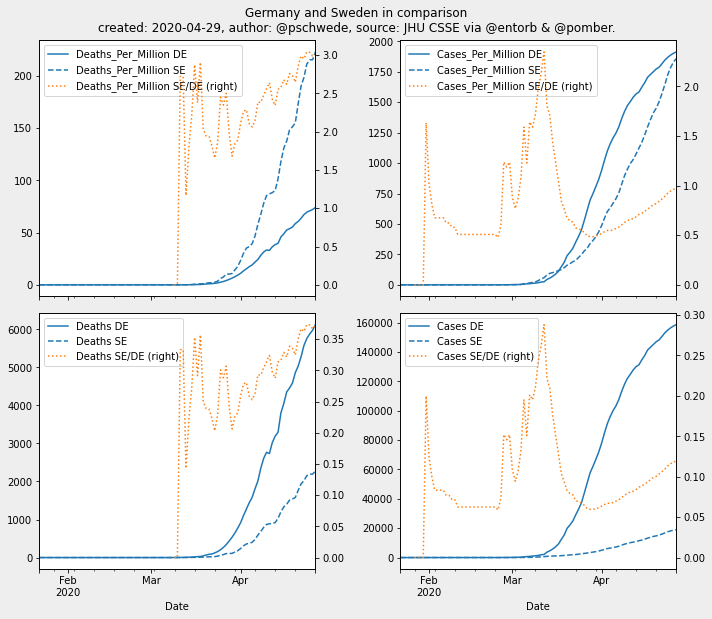

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

from covid19plots.scrape import entorb

de = entorb.to_dataframe(nation='DE')
se = entorb.to_dataframe(nation='SE')
df = se / de

fig, axes = plt.subplots(ncols=2, nrows=2)
for ax, to_compare in zip(axes.flat, ['Deaths_Per_Million', 'Cases_Per_Million', 'Deaths', 'Cases']):
  de[to_compare].plot(ax=ax, label="%s DE" % to_compare)
  se[to_compare].plot(ax=ax, label="%s SE" % to_compare, linestyle='--', color=ax.lines[-1].get_color())
  ax2 = df[to_compare].plot(ax=ax, label="%s SE/DE (right)" % to_compare, 
                            secondary_y=True, linestyle=':', )
  ax.legend(handles=ax.lines + ax2.lines, loc='upper left')
fig.set_size_inches(10,9)
fig.suptitle("Germany and Sweden in comparison\ncreated: 2020-04-29, author: @pschwede, source: JHU CSSE via @entorb & @pomber.") # , fontsize=16)
fig.set_facecolor('#EEE')
fig.tight_layout(rect=(0, 0.03, 1, 0.95))